In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
x = np.array([-0.86, -0.30, -0.05, 0.73])
n = np.array([5, 5, 5, 5])
y = np.array([0, 1, 3, 5])

In [3]:
A = np.linspace(-4,8, 50)
B = np.linspace(-10, 40, 50)

In [4]:
cA, cB = np.mgrid[-4:8:50j, -10:40:50j]
cA = cA.ravel().reshape(2500, -1)
cB = cB.ravel().reshape(2500, -1)

In [5]:
def logl(x, y, n, a, b):
    return y * (a + b * x) - n * np.log1p(np.exp(a + b * x))

In [6]:
p = logl(x, y, n, cA, cB)
p = np.exp(p.sum(axis=1))

In [7]:
nsamp = 1000
samp_indices = np.random.choice(2500, replace=True, size=nsamp, p=p / sum(p))

In [8]:
cA = cA.squeeze()
cB = cB.squeeze()

samp_A = cA[samp_indices]
samp_B = cB[samp_indices]

samp_A = samp_A + np.random.uniform(size=nsamp, low=A[0] - A[1], high=A[1] - A[0])
samp_B = samp_B + np.random.uniform(size=nsamp, low=B[0] - B[1], high=B[1] - B[0])

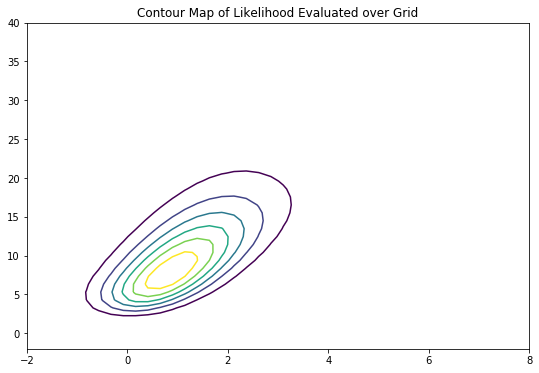

In [12]:
plt.figure(figsize=(9,6))
plt.contour(cA.reshape(50, 50), cB.reshape(50,50), p.reshape(50, 50))
plt.xlim(-2, 8)
plt.ylim(-2, 40)
plt.title("Contour Map of Likelihood Evaluated over Grid");